In [1]:
import numpy as np
from cifar_keras_vgg import VGG
from utils import Utils
import _pickle as pickle
from sklearn.metrics import classification_report, confusion_matrix
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Using TensorFlow backend.


In [2]:
targets = ['Airplane', 'Automobile', 'Bird', 'Cat', 'Deer', 'Dog', 'Frog', 'Horse', 'Ship', 'Truck']
utils = Utils()

In [3]:
def get_all_data(class_number, x_test, y_test, x_adv):
    arr = []
    j=0
    for i in range(len(x_test)):
        if np.argmax(y_test[i]) == class_number:
            arr.append(x_adv[j])
            j += 1
        else:
            arr.append(x_test[i])
    return np.array(arr)

def test_by_class(x_adv, model_path=""):
    vgg = VGG(32, 32, 3)

    model = vgg.model(dropout=True)
    model.load_weights(model_path)
    scores = model.evaluate(x_adv, y_test)
    print((scores[1] * 100))
    y_pred = model.predict_classes(x_adv)
    return y_pred

def plot_confusion_matrix(y_test, y_pred):
    rp = classification_report(np.argmax(y_test, axis=1), y_pred)
    cm = confusion_matrix(np.argmax(y_test, axis=1), y_pred)
    cm = cm.astype("float") / cm.sum(axis=1)[:, np.newaxis]

    df_cm = pd.DataFrame(cm, index=targets, columns=targets)

    plt.figure(figsize=(10, 7))
    plt.xticks(rotation=45)
    plt.yticks(rotation=60)
    hm = sns.heatmap(df_cm, annot=True)
    hm.axes.set_title("CIFAR-10 Confusion Matrix")
    hm.axes.set_xlabel("Predicted")
    hm.axes.set_ylabel("True")
    # img_name = str(model_path.split('/')[-1])+".jpg"
    # plt.savefig(img_name)
    return plt

In [4]:
def plot_by_model(X_test, y_test, model_path, adv_array, class_number):
    with open(adv_array, 'rb') as f:
        x_adv = pickle.load(f)
    x_adv = get_all_data(class_number, X_test, y_test, x_adv)
    y_pred = test_by_class(x_adv, model_path)
    plt = plot_confusion_matrix(y_test, y_pred)
    plt.show()

In [ ]:
def get_all_cf_matrices(epsilon, class_number):
    adv_array = '../adversarial_code/data/'+str(epsilon)+'_class_'+str(class_number)+'_array_adv.pickle'
    print("Perturbed Balanced Network")
    plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_array, class_number)
    print("Non-Perturbed/perturbed unbalanced on class")
    y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_"+str(class_number)+"_vgg_custom.h5")
    plt = plot_confusion_matrix(y_test, y_pred)
    plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_"+str(0)+"_vgg_custom.h5", adv_array, class_number)
    print("Non-perturbed/perturbed unbalanced on other classes")
    y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_"+str(class_number)+"_major_vgg_custom.h5")
    plt = plot_confusion_matrix(y_test, y_pred)
    plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_"+str(class_number)+"_major_vgg_custom.h5", 
                  adv_array, class_number)

In [5]:
X_train, y_train, X_test, y_test = utils.load_cifar10(normalize=True)

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [10]:
epsilon = 0.01

# Class 0 - Airplane

In [6]:
adv_0_array = '../adversarial_code/data/'+str(epsilon)+"_class_0_array_adv.pickle'

## Balanced Network

### Perturbed

10000/10000 [==============================] - 1s     
78.84
 9856/10000 [============================>.] - ETA: 0s

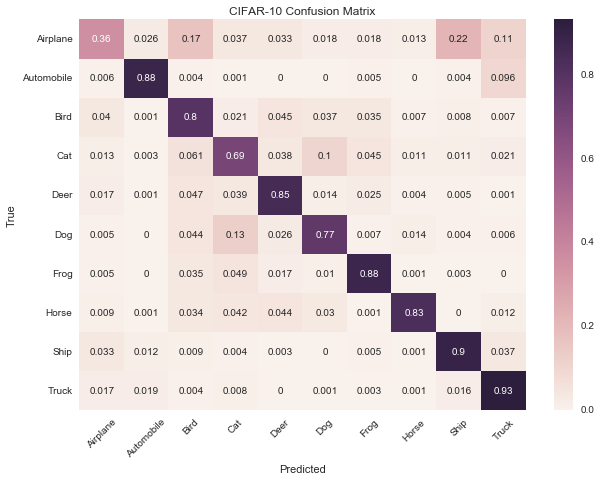

In [7]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_0_array, 0)

## Unbalanced on Airplane

### Non-perturbed 

 9792/10000 [============================>.] - ETA: 0s

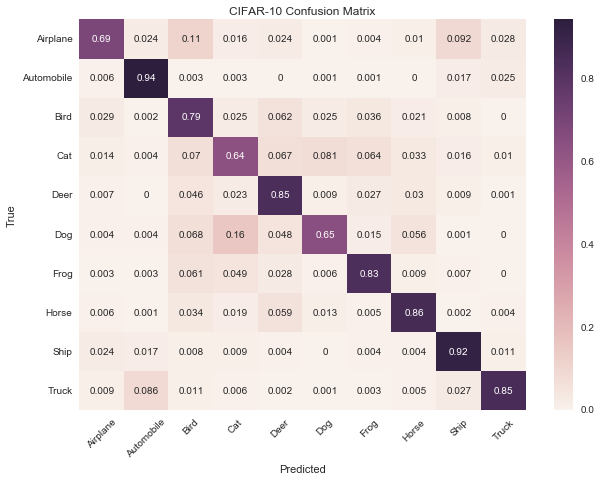

In [8]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_0_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9824/10000 [============================>.] - ETA: 0s

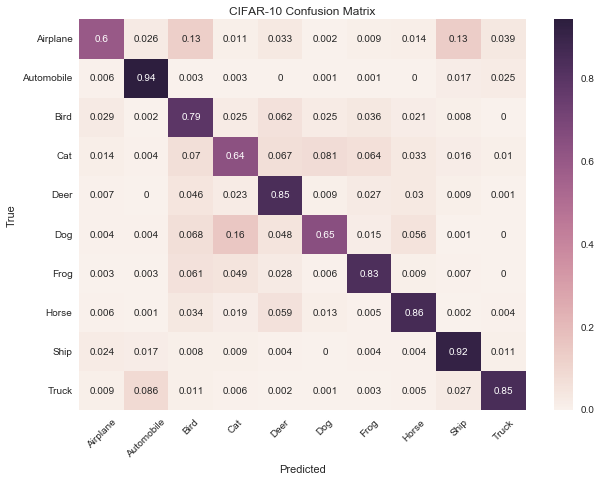

In [9]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_0_vgg_custom.h5", adv_0_array, 0)

## Unbalanced on other classes

### Non-perturbed

 9824/10000 [============================>.] - ETA: 0s

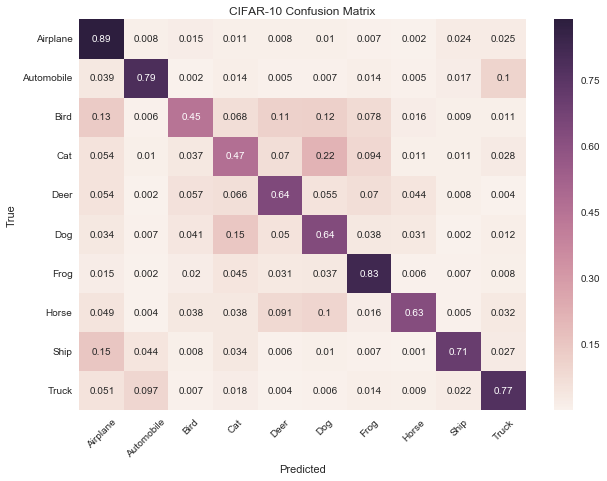

In [10]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_0_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

10000/10000 [==============================] - 1s     


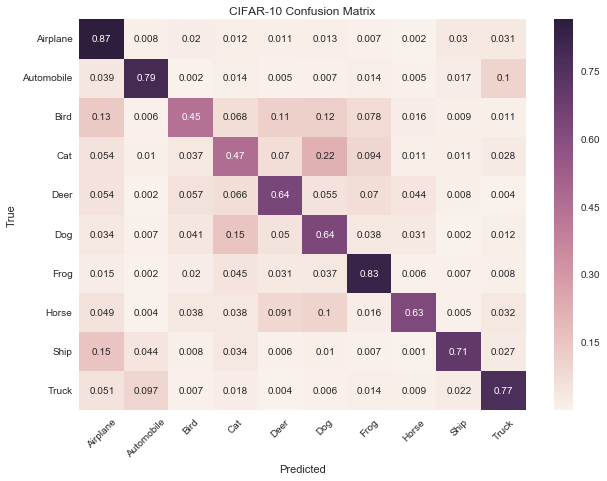

In [11]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_0_major_vgg_custom.h5", adv_0_array, 0)

# Class 1 - Automobile

In [12]:
adv_1_array = '../adversarial_code/data/'+str(epsilon)+'_class_1_array_adv.pickle'

## Balanced Network

### Perturbed

10000/10000 [==============================] - 1s     


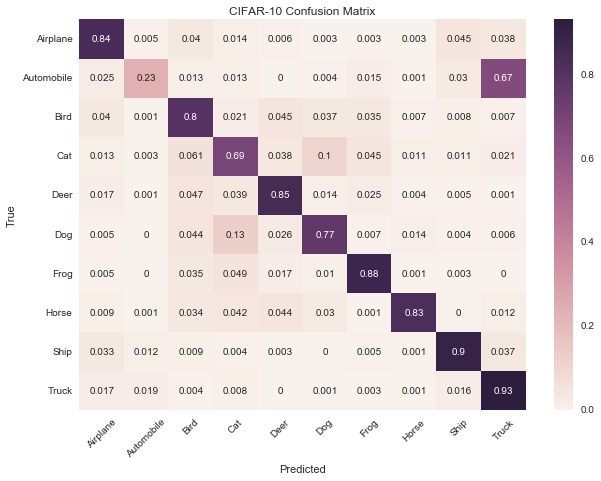

In [13]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_1_array,1)

## Unbalanced on Automobile

### Non-Perturbed

 9792/10000 [============================>.] - ETA: 0s

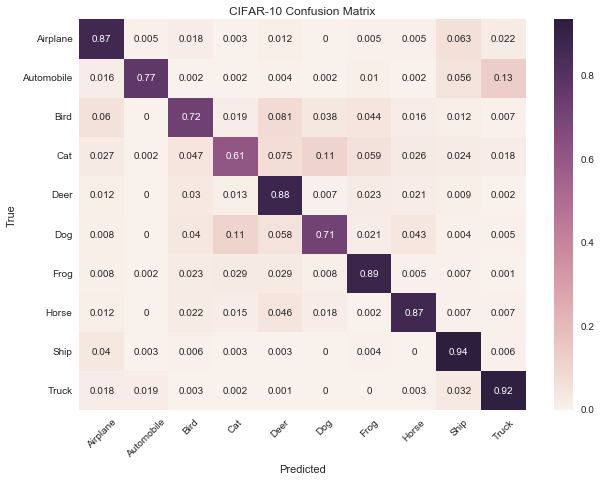

In [14]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_1_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

## Perturbed

 9632/10000 [===========================>..] - ETA: 0s

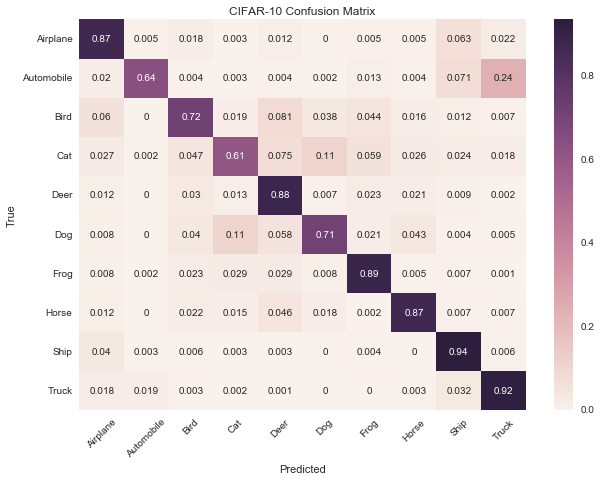

In [15]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_1_vgg_custom.h5", adv_1_array, 1)

## Unbalanced on Other Classes

### Non-perturbed

 9888/10000 [============================>.] - ETA: 0s

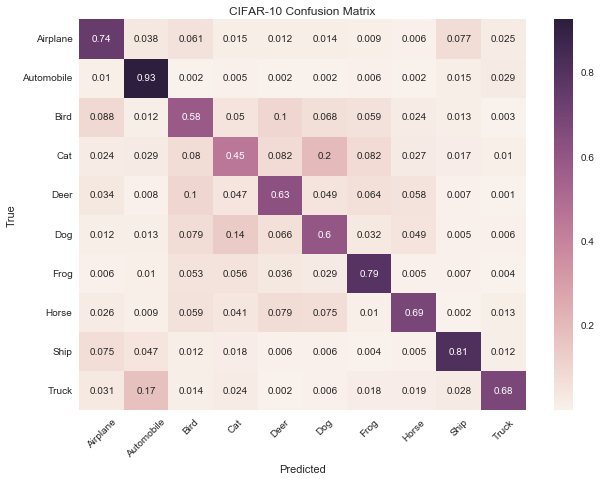

In [16]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_1_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9984/10000 [============================>.] - ETA: 0s

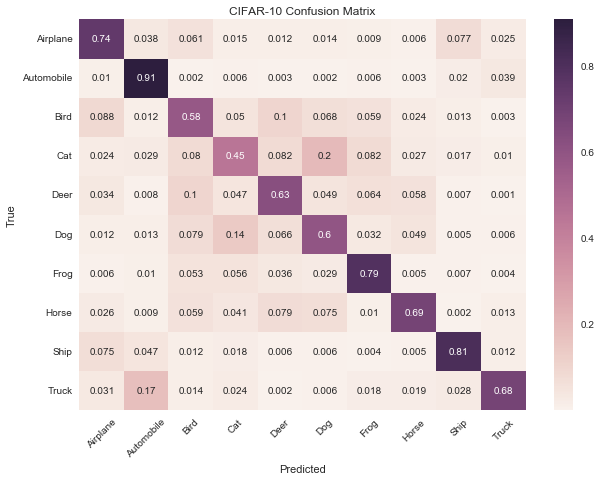

In [17]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_1_major_vgg_custom.h5", adv_1_array, 1)

# Class 2 - Bird

In [18]:
adv_2_array = '../adversarial_code/data/'+str(epsilon)+'_class_2_array_adv.pickle'

## Balanced Network

### Perturbed

 9888/10000 [============================>.] - ETA: 0s

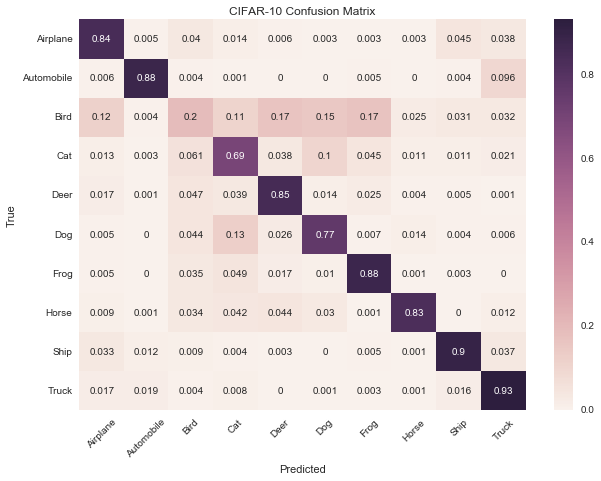

In [19]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_2_array,2)

## Unbalanced on Bird

### Non-Perturbed

 9728/10000 [============================>.] - ETA: 0s

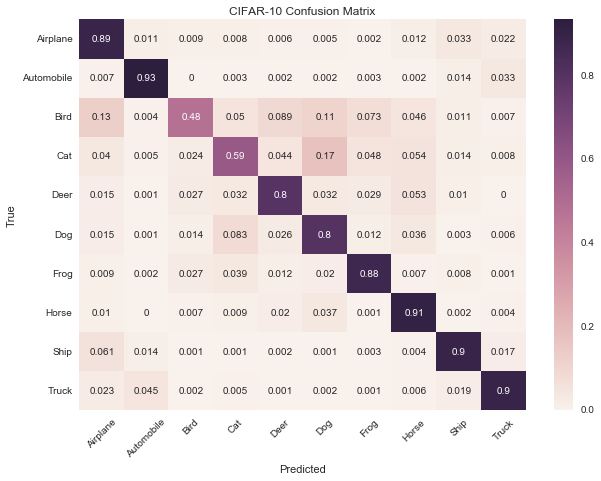

In [21]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_2_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9632/10000 [===========================>..] - ETA: 0s

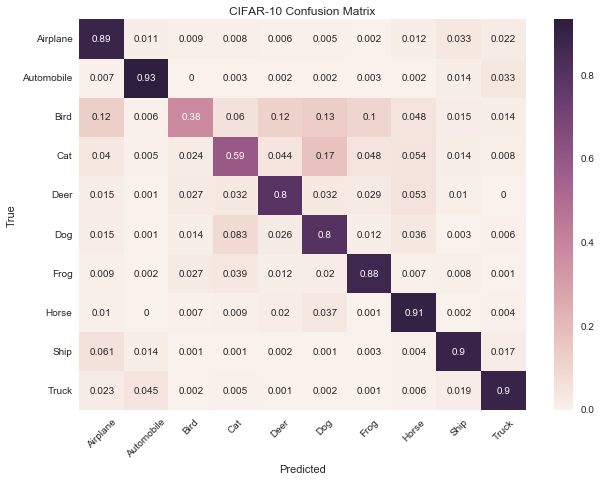

In [23]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_2_vgg_custom.h5", adv_2_array, 2)

## Unbalanced on other classes

### Non-perturbed

10000/10000 [==============================] - 1s     


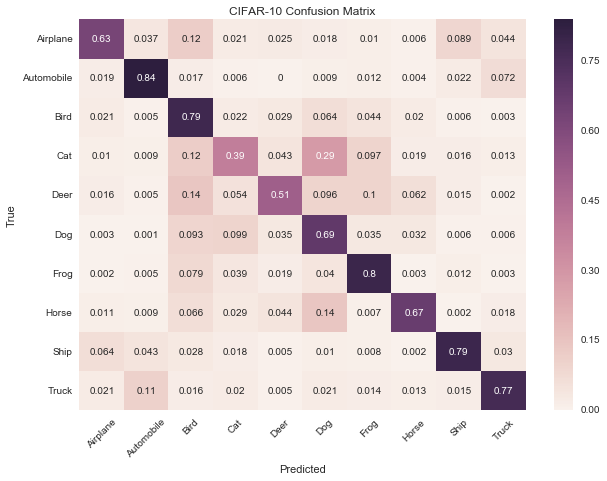

In [24]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_2_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9920/10000 [============================>.] - ETA: 0s

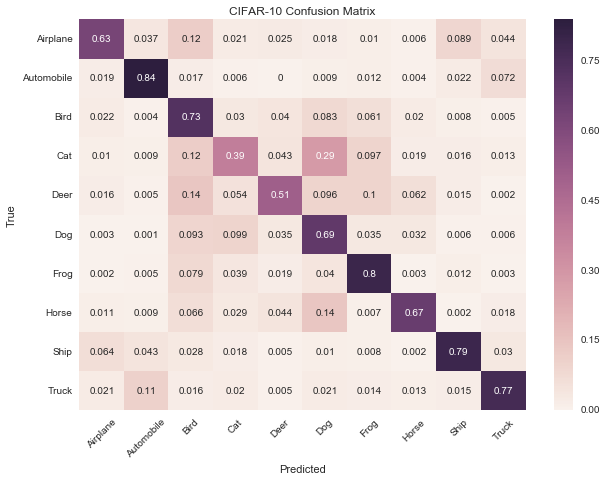

In [25]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_2_major_vgg_custom.h5", adv_2_array, 2)

# Class 3 - Cat

In [26]:
adv_3_array = '../adversarial_code/data/'+str(epsilon)+'_class_3_array_adv.pickle'

## Balanced Network

### Perturbed

 9824/10000 [============================>.] - ETA: 0s

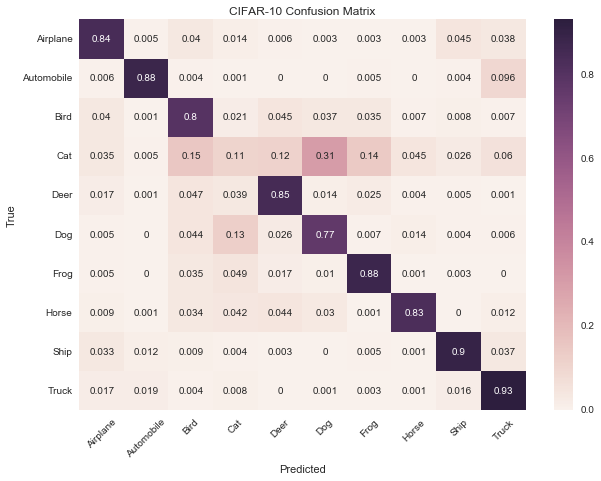

In [27]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_3_array,3)

## Unbalanced on Cat

### Non-perturbed

10000/10000 [==============================] - 1s     


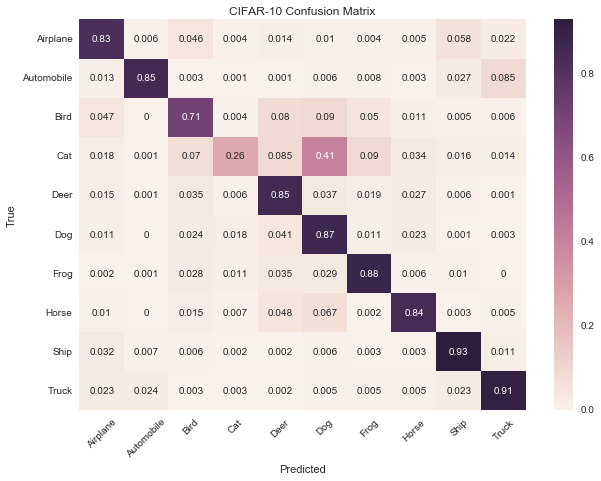

In [28]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_3_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9632/10000 [===========================>..] - ETA: 0s

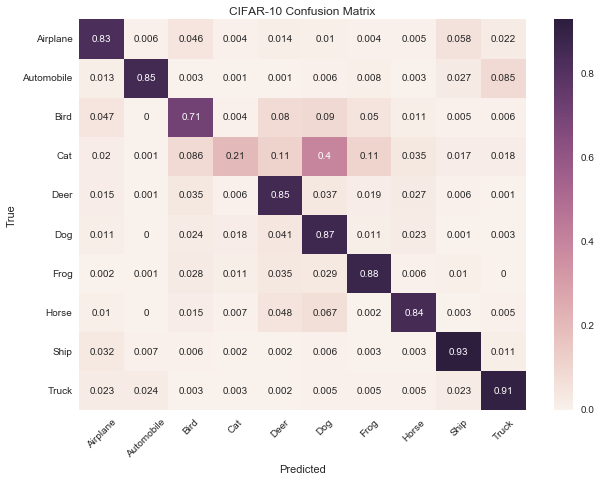

In [29]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_3_vgg_custom.h5", adv_3_array, 3)

## Unbalanced on other classes

### Non-perturbed

 9664/10000 [===========================>..] - ETA: 0s

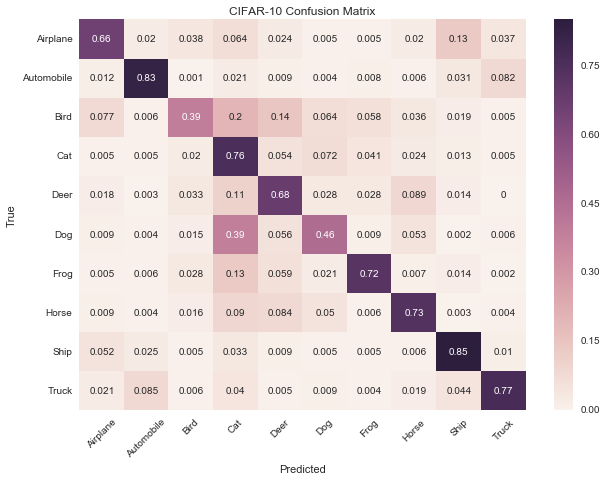

In [30]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_3_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9888/10000 [============================>.] - ETA: 0s

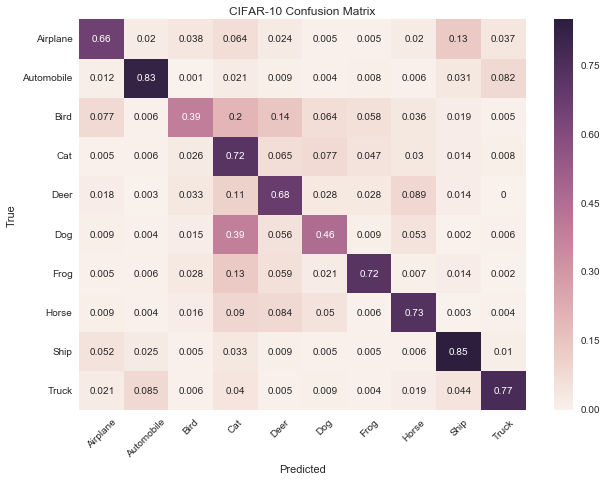

In [31]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_3_major_vgg_custom.h5", adv_3_array, 3)

# Class 4 - Deer

In [32]:
adv_4_array = '../adversarial_code/data/'+str(epsilon)+'_class_4_array_adv.pickle'

## Balanced Network

### Perturbed

 9792/10000 [============================>.] - ETA: 0s

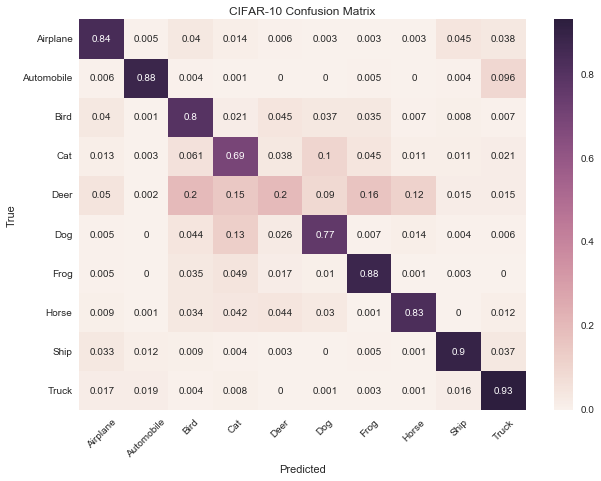

In [33]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_4_array,4)

## Unbalanced on Deer

### Non-Perturbed

 9664/10000 [===========================>..] - ETA: 0s

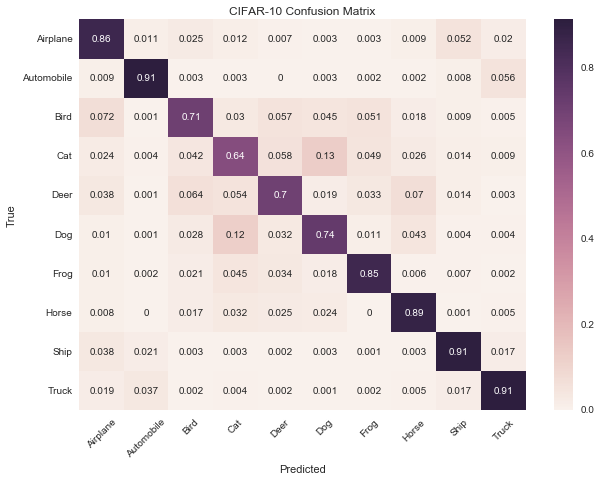

In [34]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_4_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9728/10000 [============================>.] - ETA: 0s

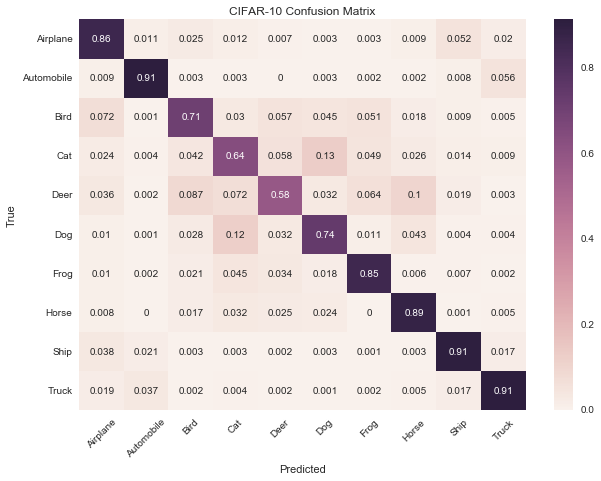

In [35]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_4_vgg_custom.h5", adv_4_array, 4)

## Unbalanced on other Classes

### Non-perturbed

 9792/10000 [============================>.] - ETA: 0s

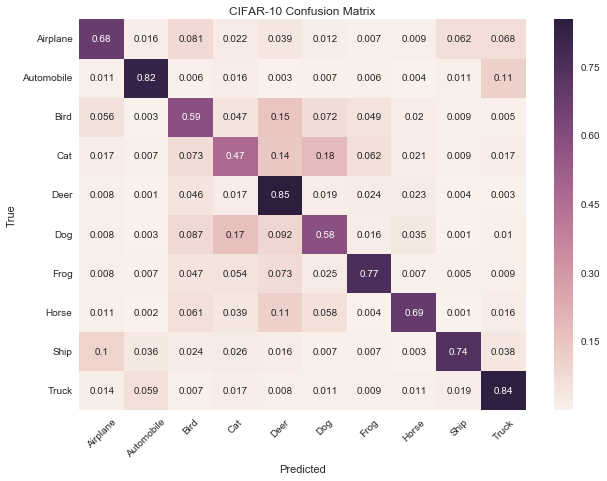

In [36]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_4_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Pertrubed

 9760/10000 [============================>.] - ETA: 0s

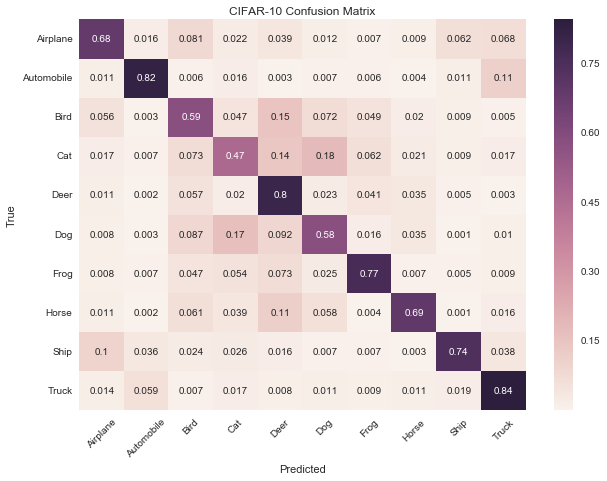

In [37]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_4_major_vgg_custom.h5", adv_4_array, 4)

# Class 5 - Dog

In [38]:
adv_5_array = '../adversarial_code/data/'+str(epsilon)+'_class_5_array_adv.pickle'

## Balanced Network

### Perturbed

 9632/10000 [===========================>..] - ETA: 0s

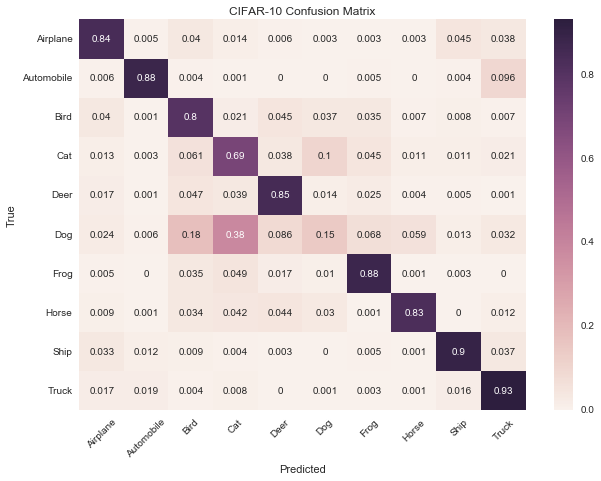

In [39]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_5_array,5)

## Unbalanced on Dog

### Non-pertrubed

 9920/10000 [============================>.] - ETA: 0s

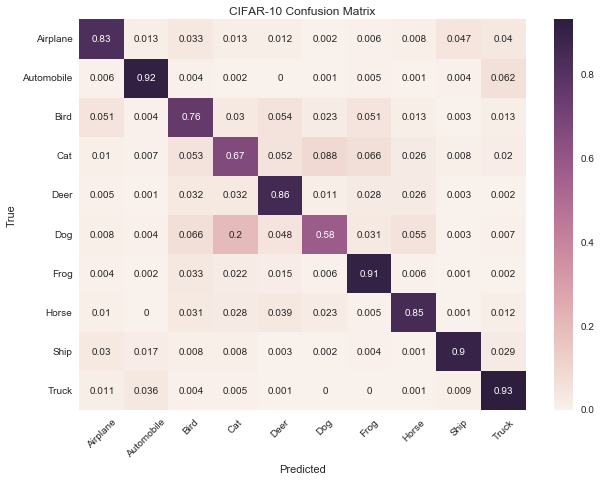

In [40]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_5_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9664/10000 [===========================>..] - ETA: 0s

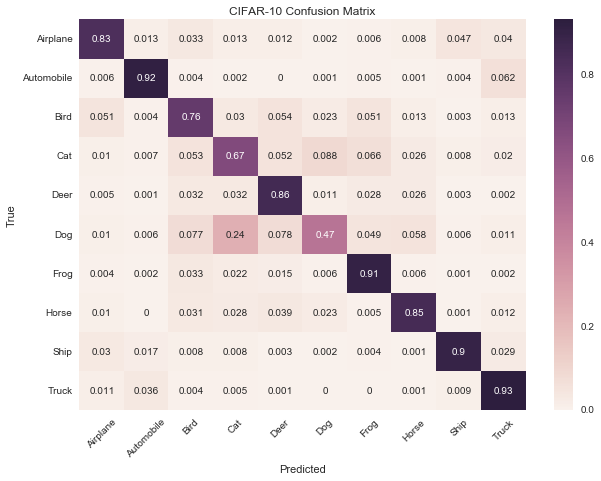

In [41]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_5_vgg_custom.h5", adv_5_array, 5)

## Unbalanced on other Classes

### Non-perturbed

 9824/10000 [============================>.] - ETA: 0s

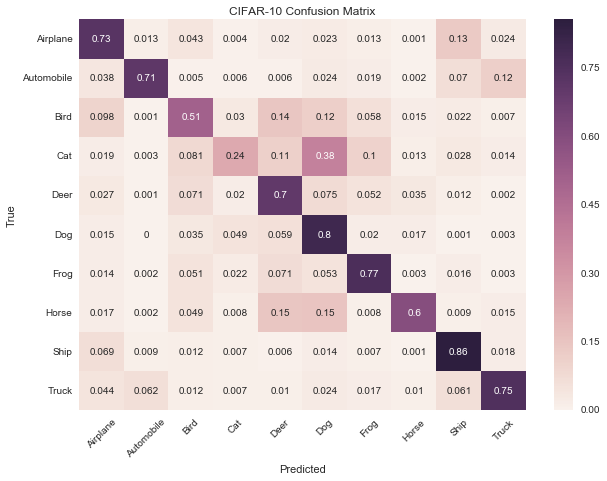

In [42]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_5_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Pertrubed

 9952/10000 [============================>.] - ETA: 0s

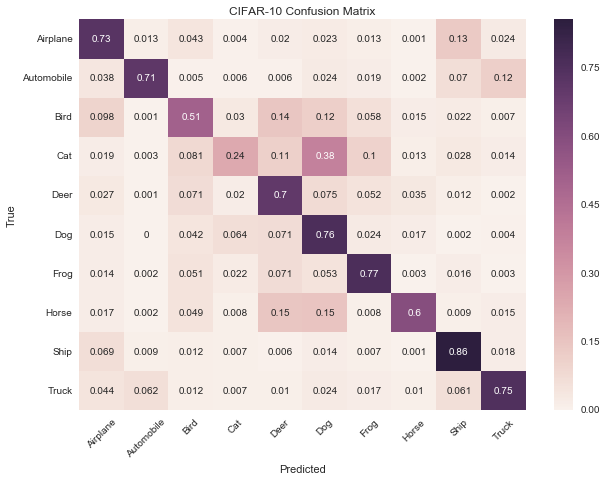

In [43]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_5_major_vgg_custom.h5", adv_5_array, 5)

# Class 6 - Frog

In [44]:
adv_6_array = '../adversarial_code/data/'+str(epsilon)+'_class_6_array_adv.pickle'

## Balanced Network

### Pertrubed

10000/10000 [==============================] - 1s     


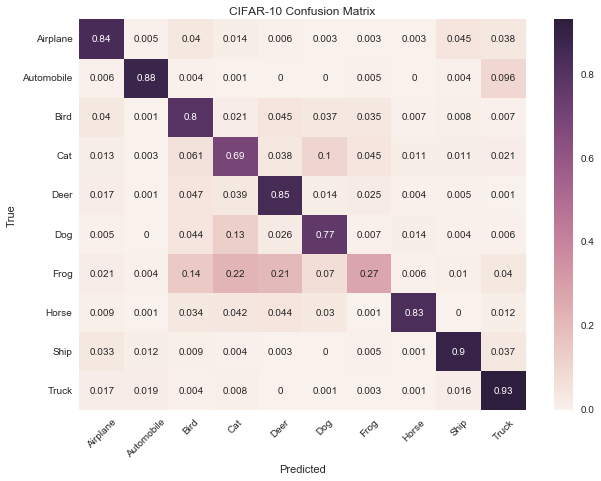

In [45]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_6_array,6)

## Unbalanced on Frog

### Non-perturbed

10000/10000 [==============================] - 1s     


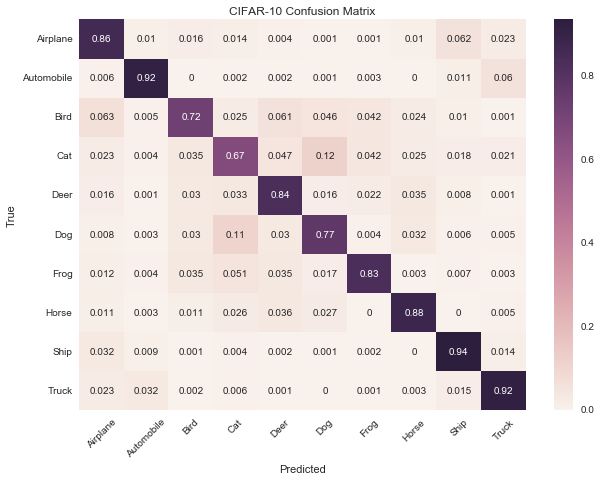

In [46]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_6_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9984/10000 [============================>.] - ETA: 0s

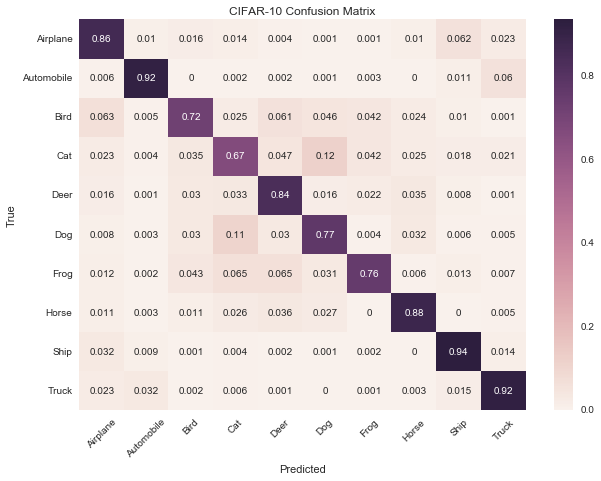

In [47]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_6_vgg_custom.h5", adv_6_array, 6)

## Unbalanced on other Classes

### Non-perturbed

 9664/10000 [===========================>..] - ETA: 0s

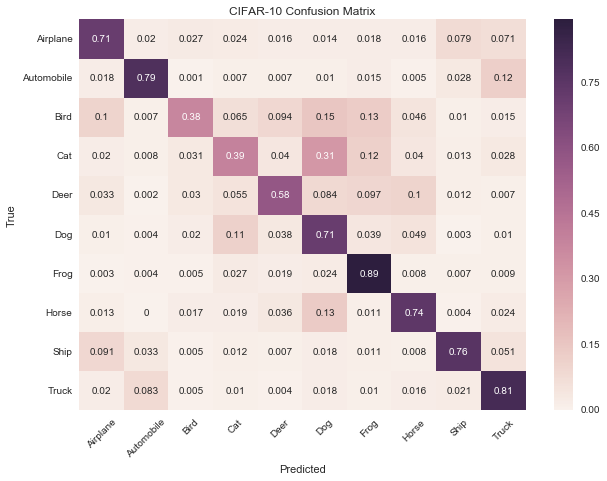

In [48]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_6_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

 9856/10000 [============================>.] - ETA: 0s

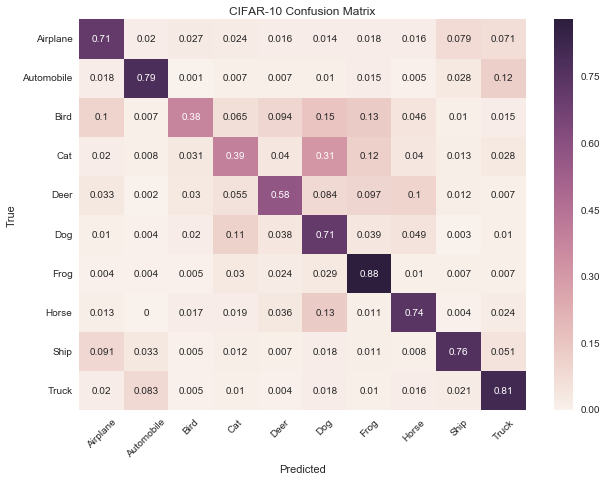

In [49]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_6_major_vgg_custom.h5", adv_6_array, 6)

# Class 7 - Horse

In [50]:
adv_7_array = '../adversarial_code/data/'+str(epsilon)+'_class_7_array_adv.pickle'

## Balanced Network

### Perturbed

10000/10000 [==============================] - 1s     
77.37
 9664/10000 [===========================>..] - ETA: 0s

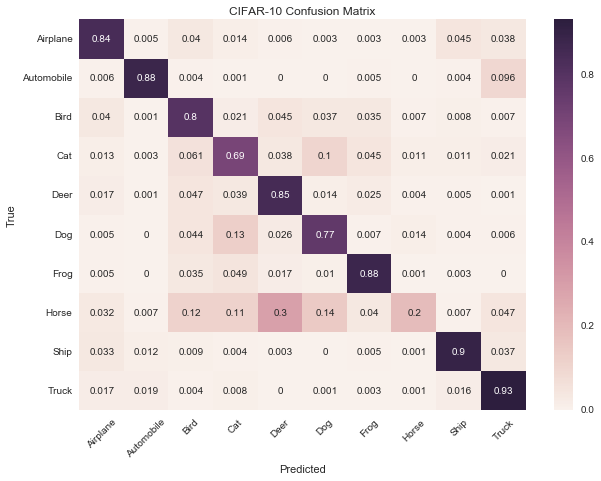

In [51]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_7_array,7)

## Unbalanced on Horse

### Non-pertrubed

 9920/10000 [============================>.] - ETA: 0s

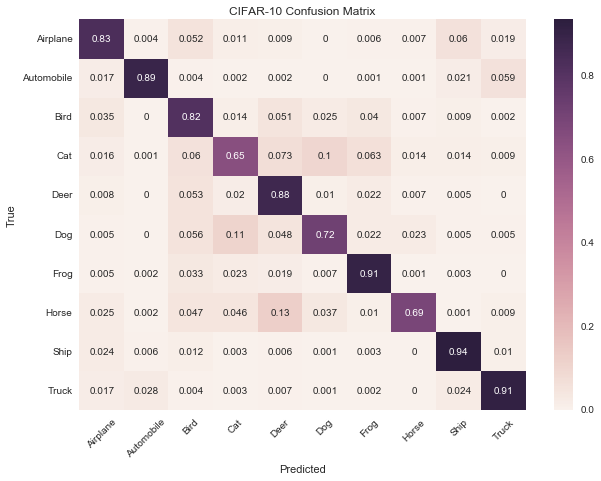

In [52]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_7_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9984/10000 [============================>.] - ETA: 0s

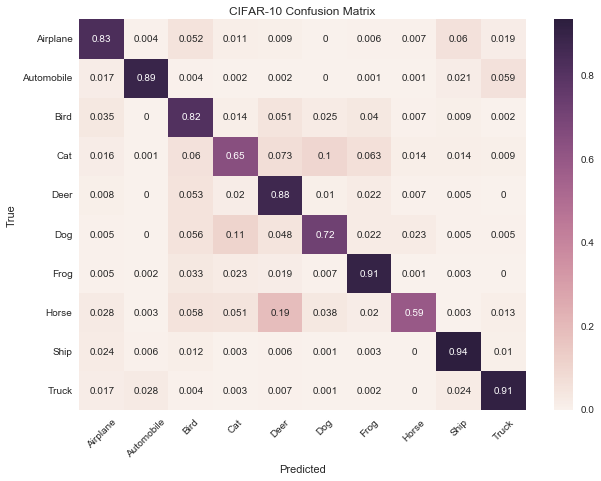

In [53]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_7_vgg_custom.h5", adv_7_array, 7)

## Unbalanced on other Classes

### Non-perturbed

 9824/10000 [============================>.] - ETA: 0s

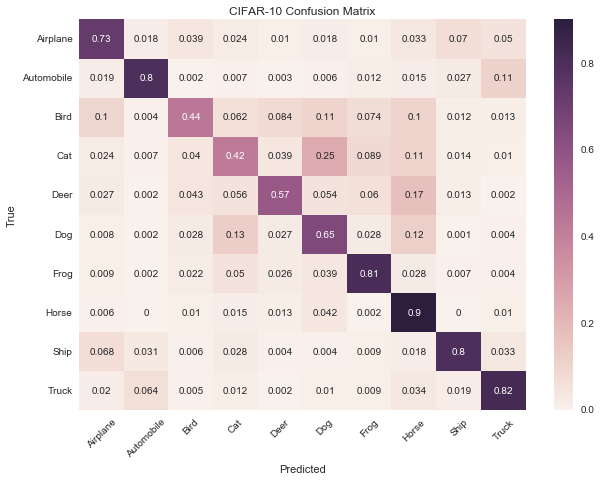

In [54]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_7_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9760/10000 [============================>.] - ETA: 0s

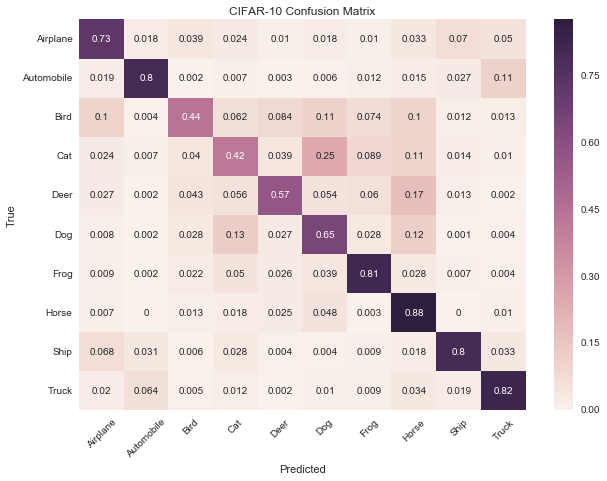

In [55]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_7_major_vgg_custom.h5", adv_7_array, 7)

# Class 8 - Ship

In [12]:
adv_8_array = '../adversarial_code/data/'+str(epsilon)+'_class_8_array_adv.pickle'

## Balanced Network

### Perturbed

 9984/10000 [============================>.] - ETA: 0s

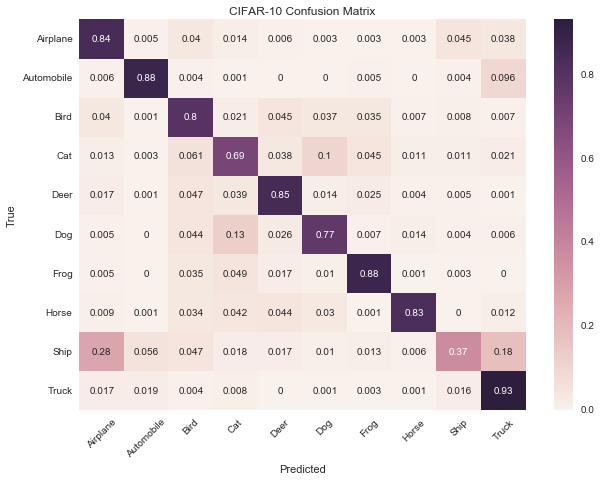

In [13]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_8_array,8)

## Unbalanced on Ship

### Non-perturbed

10000/10000 [==============================] - 1s     
83.33
 9824/10000 [============================>.] - ETA: 0s

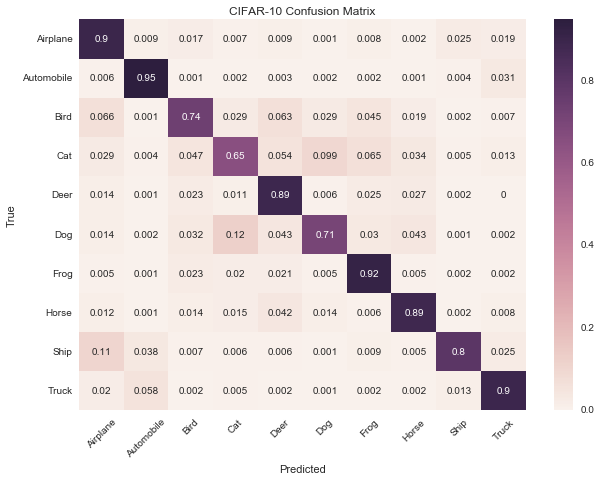

In [14]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_8_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9920/10000 [============================>.] - ETA: 0s

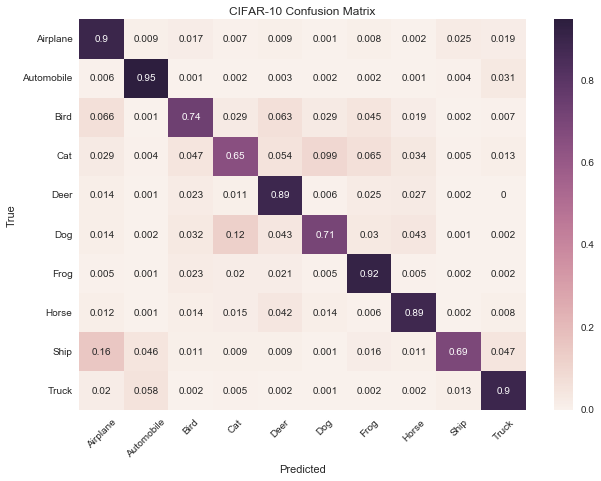

In [15]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_8_vgg_custom.h5", adv_8_array, 8)

### Unbalanced on other classes

### Non-perturbed

 9664/10000 [===========================>..] - ETA: 0s

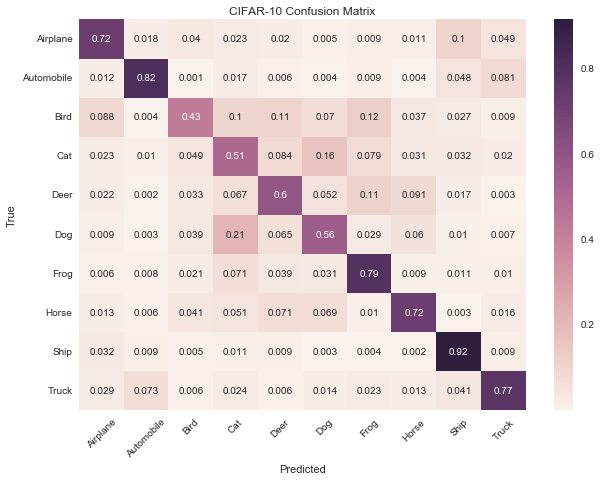

In [16]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_8_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9920/10000 [============================>.] - ETA: 0s

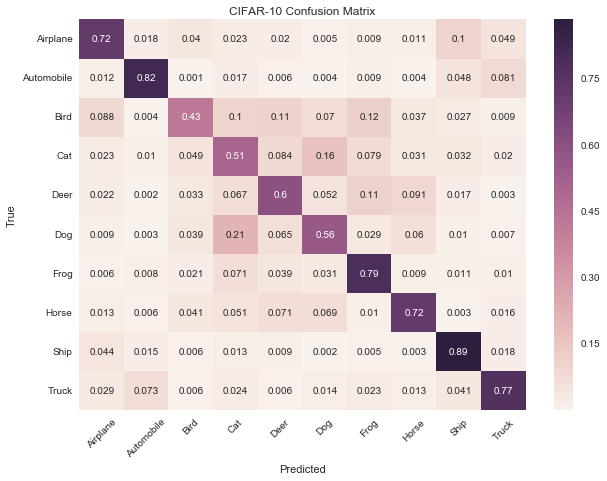

In [17]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_8_major_vgg_custom.h5", adv_8_array, 8)

# Class 9 - Truck

In [19]:
adv_9_array = '../adversarial_code/data/'+str(epsilon)+'_class_9_array_adv.pickle'

## Balanced Network

### Perturbed

 9920/10000 [============================>.] - ETA: 0s

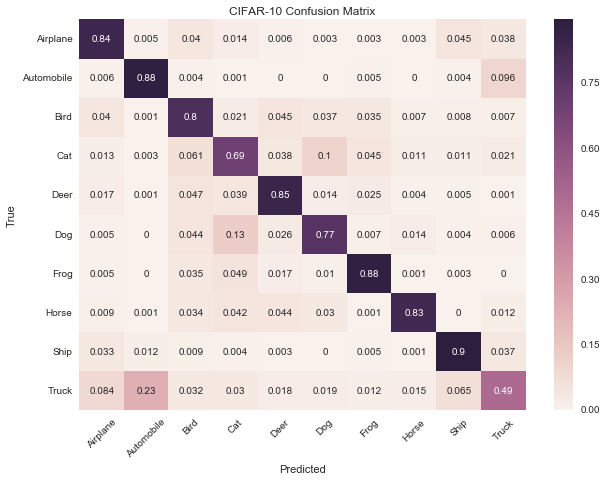

In [20]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/balanced_vgg_custom.h5", adv_9_array,9)

## Unbalanced on Truck

### Non-perturbed

 9728/10000 [============================>.] - ETA: 0s

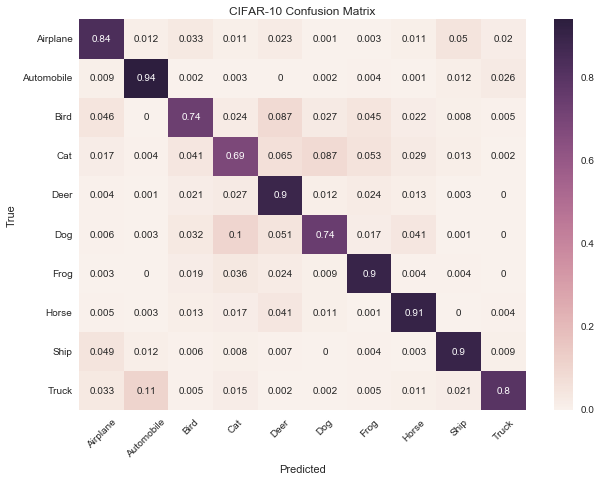

In [21]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_9_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9824/10000 [============================>.] - ETA: 0s

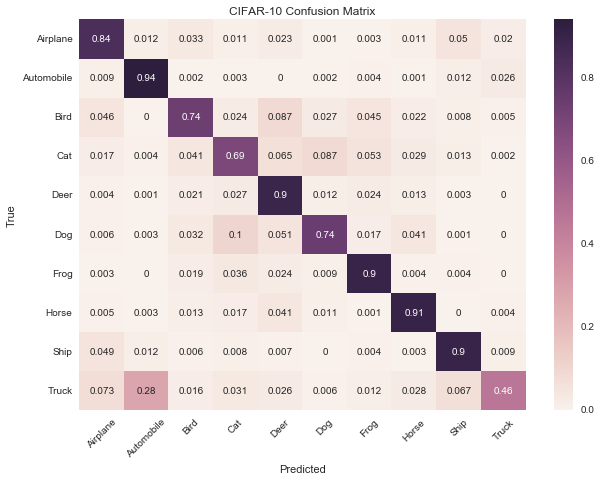

In [22]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_9_vgg_custom.h5", adv_9_array, 9)

## Unbalanced on other classes

### Non-perturbed

 9632/10000 [===========================>..] - ETA: 0s

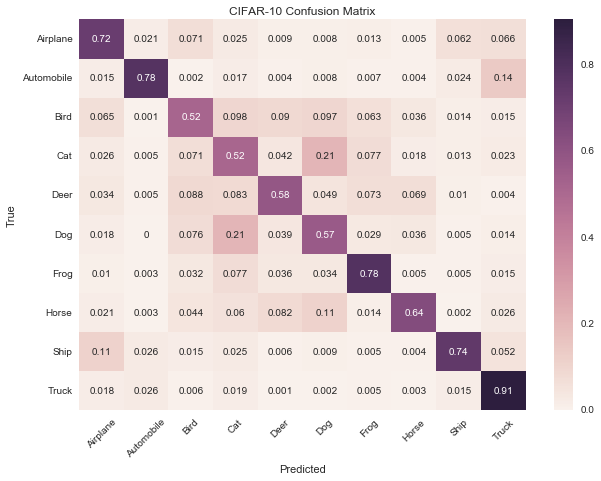

In [23]:
y_pred = test_by_class(X_test, "../adversarial_code/normalized/unbalanced_9_major_vgg_custom.h5")
plt = plot_confusion_matrix(y_test, y_pred)

### Perturbed

 9824/10000 [============================>.] - ETA: 0s

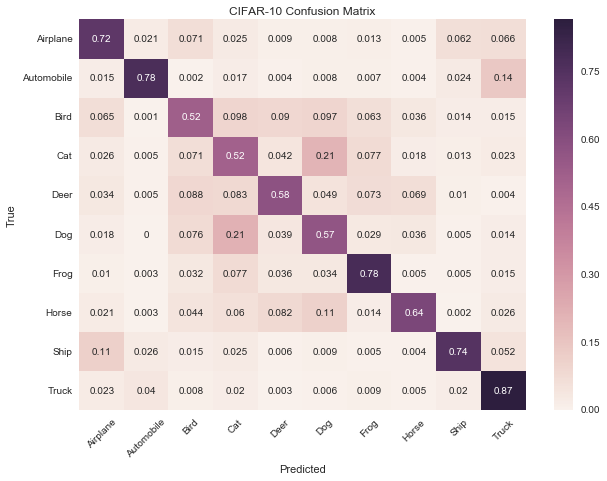

In [24]:
plot_by_model(X_test, y_test, "../adversarial_code/normalized/unbalanced_9_major_vgg_custom.h5", adv_9_array, 9)